## Mission 1. Netflix and Code
[넷플릭스 데이터셋](https://www.kaggle.com/shivamb/netflix-shows)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

netflix = pd.read_csv("dataset/netflix_titles.csv")

netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Mandatory Part
**한국 작품**은 총 얼마나 있는가?
    - country column을 기준으로 한다.
    - "South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)

In [46]:
# 한국 작품은 총 183편 있다.

len(netflix[netflix['country'] == "South Korea"])

183

### Bonus Part
**가장 많은 작품이 올라간 국가**는 어디이고, 얼마나 많은 작품이 있는가?
    - country column을 기준으로 한다.
    - 단일 국가인 경우를 기준으로 결과를 구해보자.

In [29]:
# 우선 결측치(국가 정보가 없는 행)를 제거하자
netflix_single_country = netflix.dropna(axis=0, subset=['country'])
netflix_single_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7280 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7280 non-null   object
 1   type          7280 non-null   object
 2   title         7280 non-null   object
 3   director      5193 non-null   object
 4   cast          6658 non-null   object
 5   country       7280 non-null   object
 6   date_added    7271 non-null   object
 7   release_year  7280 non-null   int64 
 8   rating        7274 non-null   object
 9   duration      7280 non-null   object
 10  listed_in     7280 non-null   object
 11  description   7280 non-null   object
dtypes: int64(1), object(11)
memory usage: 739.4+ KB


In [31]:
# 다음으로, 단일 국가에서 만든 작품만 골라보자
# 'country'열에 ','(쉼표)가 없는 경우를 조건으로 필터링했다
netflix_single_country[~(netflix_single_country['country'].str.contains(','))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7779,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [32]:
netflix_single_country = netflix_single_country[~(netflix_single_country['country'].str.contains(','))]

# 국가별로 만든 작품의 개수를 세어보자
netflix_single_country['show_id'].groupby(by=netflix_single_country['country']).count()

country
Argentina       50
Australia       83
Austria          4
Bangladesh       2
Belarus          1
                ..
Uruguay          3
Venezuela        1
Vietnam          5
West Germany     1
Zimbabwe         1
Name: show_id, Length: 69, dtype: int64

In [45]:
netflix_by_country = netflix_single_country['show_id'].groupby(by=netflix_single_country['country']).count()

# 가장 많이 만든 국가는 미국, 2555편의 작품을 만들었다
netflix_by_country[netflix_by_country == max(netflix_by_country)]

country
United States    2555
Name: show_id, dtype: int64

## Mission 2. 가즈아!
[비트코인 데이터셋](https://www.kaggle.com/rishidamarla/bitcoin-prices-20112015)  
[이더리움 데이터셋](https://www.kaggle.com/prasoonkottarathil/ethereum-historical-dataset?select=ETH_day.csv)

### Mandatory Part
2016.6 ~ 2017.6 기간의 **5-MA(Moving Average) 비트코인 가격 그래프**를 그려주세요.
    - 선의 색깔은 노란색(#f2a900) 으로 해야합니다.
    - x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
    - 이동평균의 기준은 `Open` Column으로 계산합니다.
    - 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

In [49]:
# "Date" column을 인덱스로 지정하고 "Date", "Open" column만 가져오자
bitcoin = pd.read_csv("dataset/BitCoin.csv", index_col="Date", parse_dates=True, usecols=["Date", "Open"])

bitcoin

,Open
Date,
2017-09-22,3628.02
2017-09-21,3901.47
2017-09-20,3916.36
2017-09-19,4073.79
2017-09-18,3591.09
...,...
2013-02-05,116.38
2013-01-05,139.00
2013-04-30,144.00


In [78]:
# 인덱스 기준으로 정렬
bitcoin.sort_index(inplace=True)

# 2016.6 ~ 2017.6 기간만 가져오자
bitcoin = bitcoin.loc['2016-06-01':'2017-06-30']

# 5-days moving average
bitcoin = bitcoin.Open.rolling(window=5).mean()

In [79]:
bitcoin

Date
2016-06-01         NaN
2016-06-02         NaN
2016-06-03         NaN
2016-06-04         NaN
2016-06-05     418.238
                ...   
2017-06-26    2666.942
2017-06-27    2624.426
2017-06-28    2593.564
2017-06-29    2559.372
2017-06-30    2545.770
Name: Open, Length: 377, dtype: float64

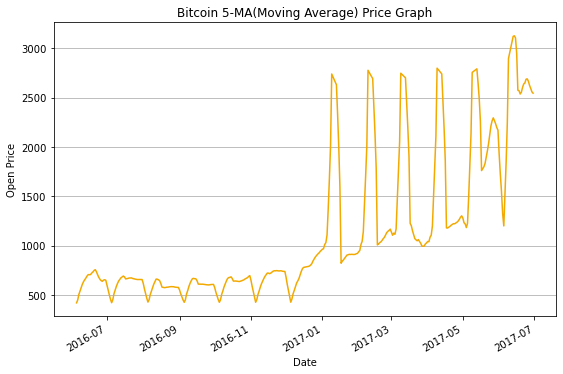

In [94]:
plt.figure(figsize=(9, 6))

plt.xlabel("Date")
plt.ylabel("Open Price")
plt.title("Bitcoin 5-MA(Moving Average) Price Graph")

bitcoin.plot(color='#f2a900')

plt.grid(True, axis='y')
plt.show()

### Bonus Part
2016.6 ~ 2017.6 기간에 해당하는 **비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에** 그려주세요.
    - 선의 색깔은 비트코인 : 노란색(#f2a900), 이더리움 : 검은색(#3c3c3d) 으로 해야합니다.
    - x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
    - 이동평균의 기준은 Open Column으로 계산합니다.
    - 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

In [98]:
# "Date" column을 인덱스로 지정하고 "Date", "Open" column만 가져오자
ethereum = pd.read_csv("dataset/ETH_day.csv", index_col="Date", parse_dates=True, usecols=["Date", "Open"])

# 인덱스 기준으로 정렬
ethereum.sort_index(inplace=True)

# 2016.6 ~ 2017.6 기간만 가져오자
ethereum = ethereum.loc['2016-06-01':'2017-06-30']

# 5-days moving average
ethereum = ethereum.Open.rolling(window=5).mean()

ethereum

Date
2016-06-01        NaN
2016-06-02        NaN
2016-06-03        NaN
2016-06-04        NaN
2016-06-05     13.982
               ...   
2017-06-26    310.850
2017-06-27    296.592
2017-06-28    289.898
2017-06-29    288.066
2017-06-30    285.866
Name: Open, Length: 395, dtype: float64

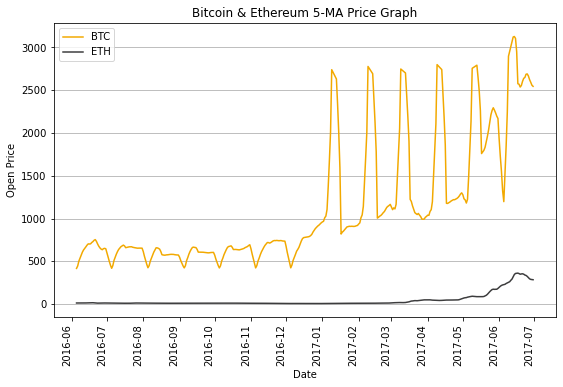

In [101]:
from matplotlib.dates import MonthLocator, DateFormatter

plt.figure(figsize=(9, 6))

plt.xlabel("Date")
plt.ylabel("Open Price")
plt.title("Bitcoin & Ethereum 5-MA Price Graph")

ax = bitcoin.plot(color='#f2a900', label='BTC')
ethereum.plot(color='#3c3c3d', label='ETH')

ax.xaxis.set_major_locator(MonthLocator())
ax.tick_params(axis="x", labelrotation= 90)

plt.grid(True, axis='y')
plt.legend()
plt.show()